# Mood classfication using CNN (HAPPY / SAD)

 STEPS -
- Create 3 folder in your desktop 
- Training, Testing, Validation
- Inside training create 2 folder as happy or not happy
- paste all the photo in testing part 

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image 
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os
#image data generator is the package to lable the images & it will automatically lable all the images

In [2]:
img = image.load_img(r'E:\Data science Projects\CNN - Happy or sad\training\happy\me1.jpg')

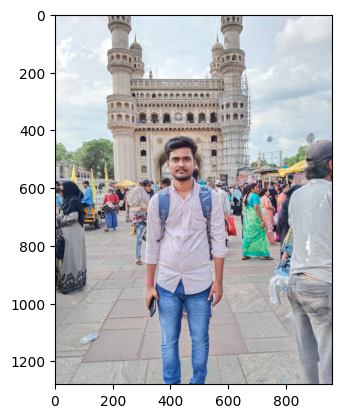

In [3]:
plt.imshow(img)

In [4]:
i1 = cv2.imread(r'E:\Data science Projects\CNN - Happy or sad\training\happy\me1.jpg')
i1
# 3 dimension metrics are created for the image
# the value ranges from 0-255

array([[[242, 231, 227],
        [242, 231, 227],
        [242, 231, 227],
        ...,
        [234, 232, 231],
        [234, 232, 231],
        [234, 232, 231]],

       [[242, 231, 227],
        [242, 231, 227],
        [242, 231, 227],
        ...,
        [234, 232, 231],
        [234, 232, 231],
        [234, 232, 231]],

       [[242, 231, 227],
        [242, 231, 227],
        [242, 231, 227],
        ...,
        [234, 232, 231],
        [234, 232, 231],
        [234, 232, 231]],

       ...,

       [[184, 187, 191],
        [183, 186, 190],
        [180, 183, 187],
        ...,
        [166, 154, 152],
        [165, 153, 151],
        [164, 152, 150]],

       [[177, 180, 184],
        [175, 178, 182],
        [173, 176, 180],
        ...,
        [166, 154, 152],
        [165, 153, 151],
        [164, 152, 150]],

       [[171, 174, 178],
        [170, 173, 177],
        [169, 172, 176],
        ...,
        [165, 153, 151],
        [164, 152, 150],
        [164, 152, 150]]

In [5]:
i1.shape
# shape of your image height, weight, rgb

(1280, 960, 3)

In [6]:
train = ImageDataGenerator(rescale = 1/255)
validataion = ImageDataGenerator(rescale = 1/255)
# to scale all the images i need to divide with 255
# we need to resize the image using 200, 200 pixel

In [18]:
train_dataset = train.flow_from_directory(r'E:\Data science Projects\CNN - Happy or sad\training',
                                         target_size = (255,255),
                                         batch_size = 3,
                                         class_mode = 'binary')
validataion_dataset = validataion.flow_from_directory(r'E:\Data science Projects\CNN - Happy or sad\validation',
                                          target_size = (255,255),
                                          batch_size = 3,
                                          class_mode = 'binary') 

Found 12 images belonging to 2 classes.
Found 12 images belonging to 2 classes.


In [19]:
train_dataset.class_indices

{'happy': 0, 'not happy': 1}

In [20]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [21]:
# now we are applying maxpooling 

model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (255,255,3)),
                                    tf.keras.layers.MaxPool2D(2,2), #3 filtr we applied hear
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),    
                                    #                       
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2), 
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    #
                                    tf.keras.layers.Dense(1,activation= 'sigmoid')
                                    ]
                                    )

In [22]:
model.compile(loss='binary_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(lr = 0.001),
              metrics = ['accuracy']
              )

In [23]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch = 3,
                     epochs = 8,
                     validation_data = validataion_dataset)

Epoch 1/8
3/3 [==============================] - 7s 1s/step - loss: 18.7353 - accuracy: 0.0000e+00 - val_loss: 0.6812 - val_accuracy: 0.5833
Epoch 2/8
3/3 [==============================] - 3s 1s/step - loss: 2.0937 - accuracy: 0.6667 - val_loss: 0.6978 - val_accuracy: 0.4167
Epoch 3/8
3/3 [==============================] - 3s 1s/step - loss: 0.6283 - accuracy: 0.5556 - val_loss: 0.5961 - val_accuracy: 0.5833
Epoch 4/8
3/3 [==============================] - 3s 1s/step - loss: 1.0470 - accuracy: 0.3333 - val_loss: 0.6018 - val_accuracy: 0.6667
Epoch 5/8
3/3 [==============================] - 3s 1s/step - loss: 0.5704 - accuracy: 0.5556 - val_loss: 0.4706 - val_accuracy: 1.0000
Epoch 6/8
3/3 [==============================] - 3s 1s/step - loss: 0.4436 - accuracy: 0.8889 - val_loss: 0.3739 - val_accuracy: 0.9167
Epoch 7/8
3/3 [==============================] - 3s 1s/step - loss: 0.4803 - accuracy: 0.7778 - val_loss: 0.4105 - val_accuracy: 0.5833
Epoch 8/8
3/3 [============================

In [24]:
dir_path = r'E:\Data science Projects\CNN - Happy or sad\testing'
for i in os.listdir(dir_path ):
    print(i)
    #img = image.load_img(dir_path+ '//'+i, target_size = (200,200))
   # plt.imshow(img)
   # plt.show()

me.jpg
me1.jpg
me10.jpg
me11.jpg
me2.jpg
me3.jpg
me4.jpg
me5.jpg
me6.jpg
me7.jpg
me8.jpg
me9.jpg


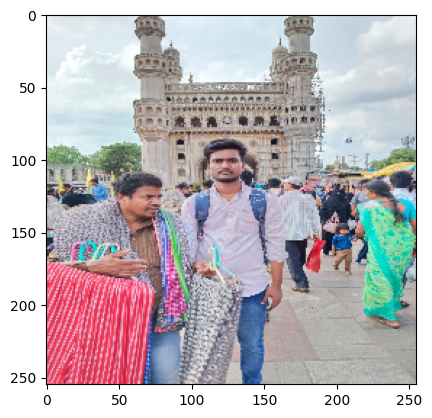

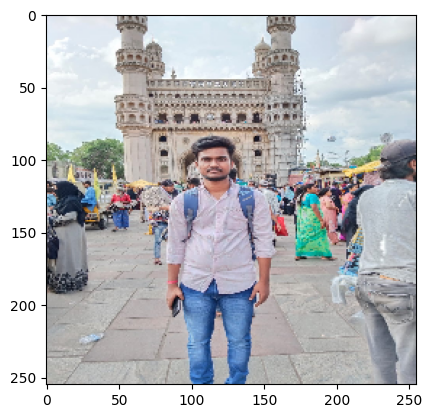

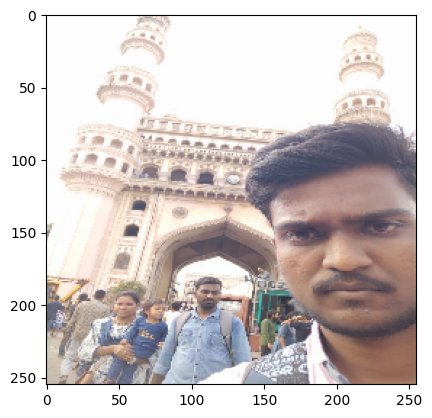

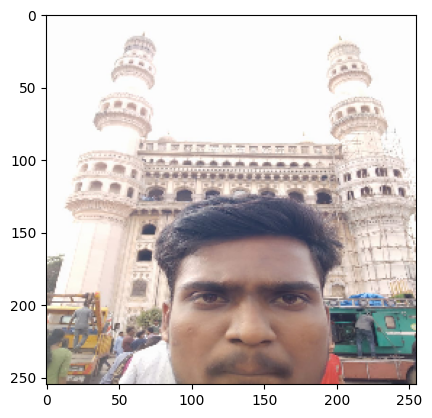

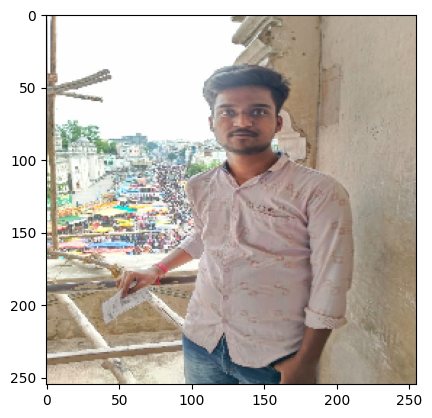

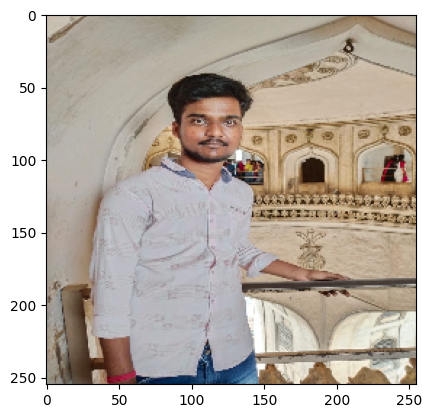

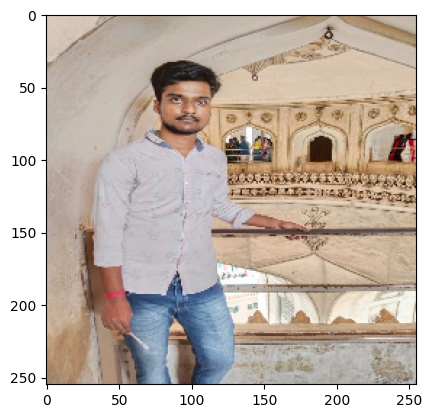

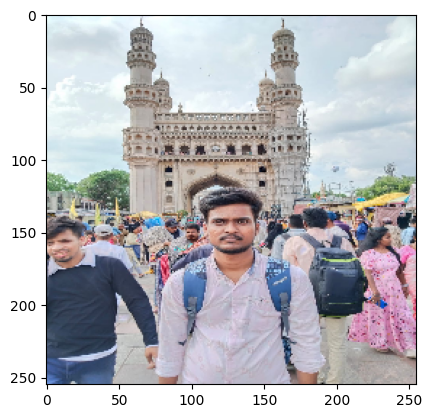

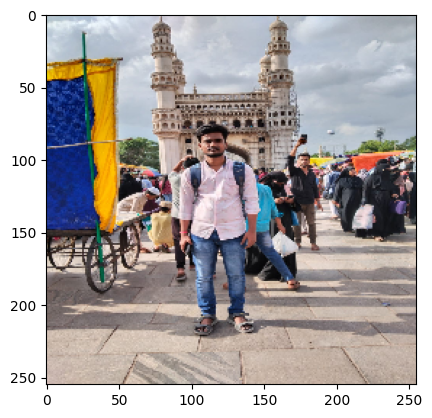

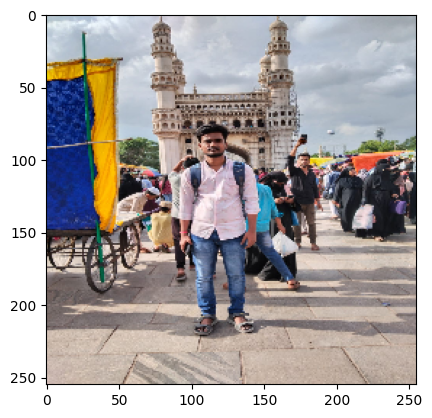

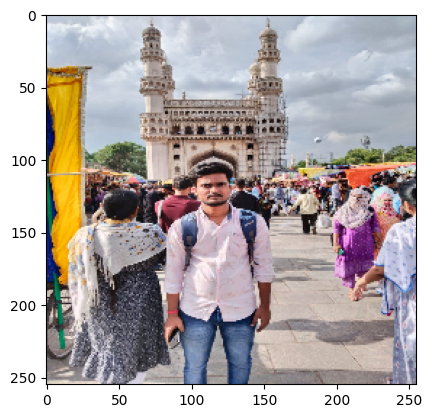

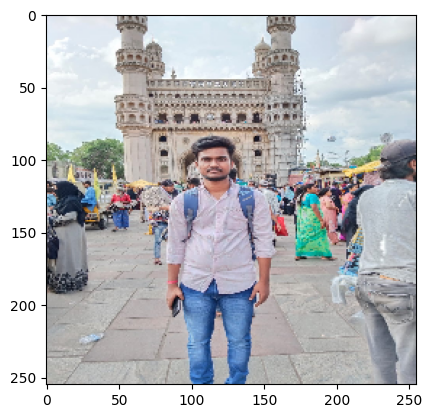

In [25]:
dir_path = r'E:\Data science Projects\CNN - Happy or sad\testing'
for i in os.listdir(dir_path ):
    img = image.load_img(dir_path+ '//'+i, target_size = (255,255))
    plt.imshow(img)
    plt.show()

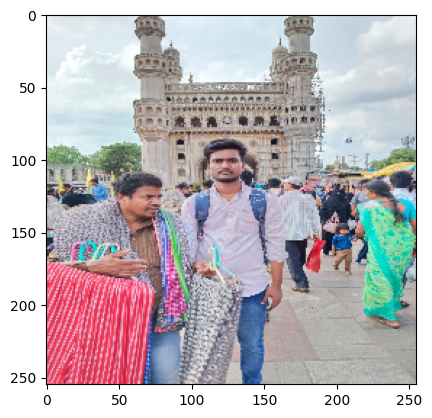

1/1 [==============================] - 0s 270ms/step
i am happy


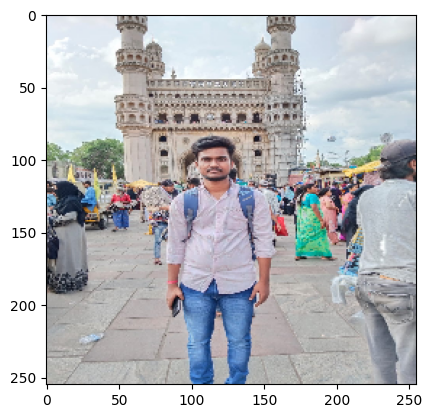

1/1 [==============================] - 0s 85ms/step
 i am not happy


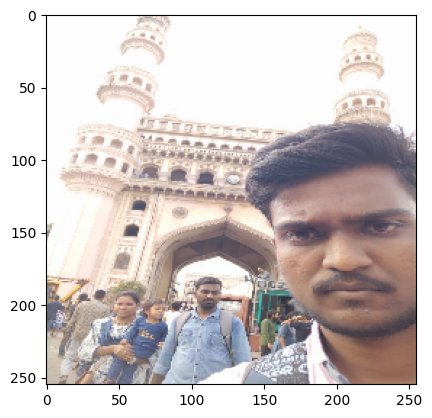

1/1 [==============================] - 0s 85ms/step
 i am not happy


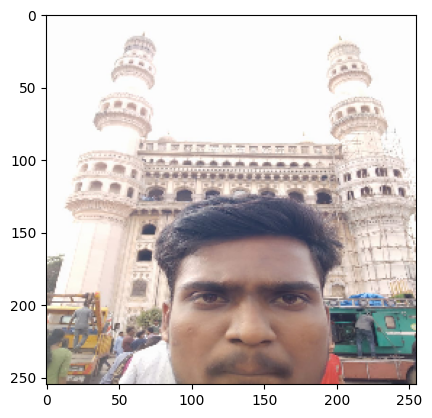

1/1 [==============================] - 0s 101ms/step
i am happy


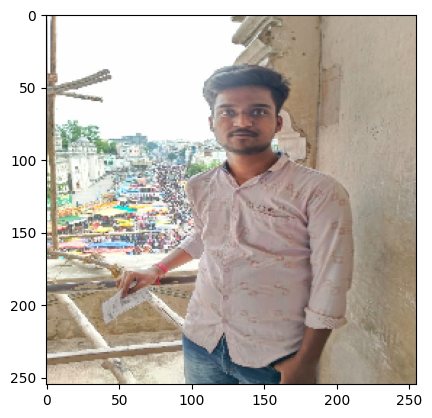

1/1 [==============================] - 0s 101ms/step
 i am not happy


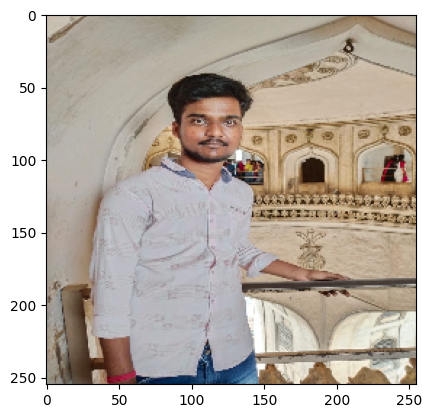

1/1 [==============================] - 0s 95ms/step
 i am not happy


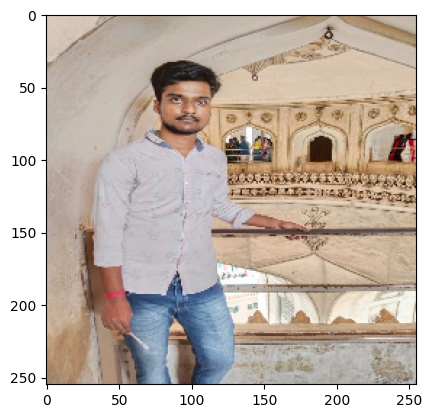

1/1 [==============================] - 0s 86ms/step
i am happy


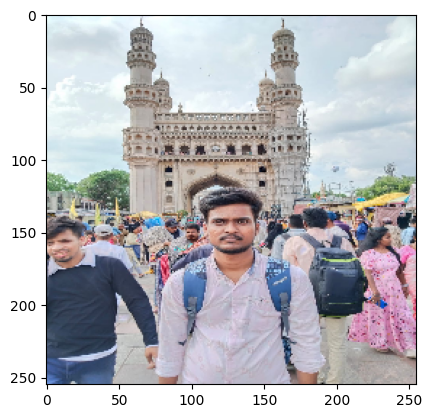

1/1 [==============================] - 0s 91ms/step
i am happy


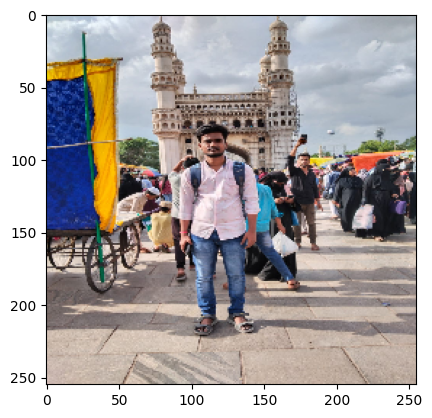

1/1 [==============================] - 0s 95ms/step
 i am not happy


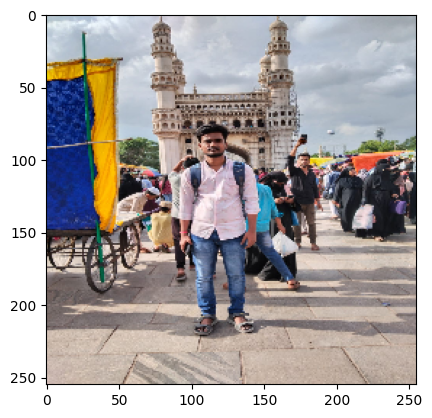

1/1 [==============================] - 0s 99ms/step
 i am not happy


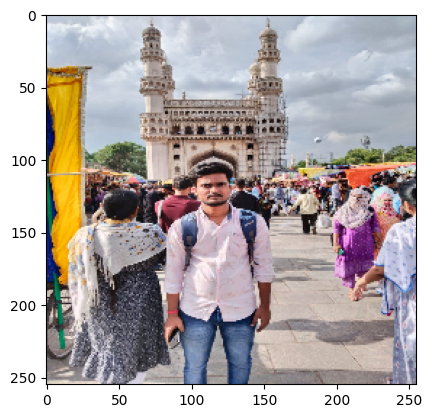

1/1 [==============================] - 0s 95ms/step
 i am not happy


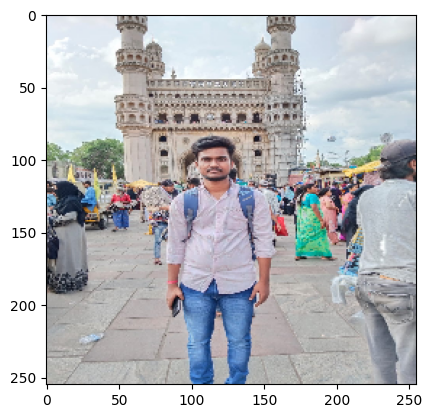

1/1 [==============================] - 0s 96ms/step
 i am not happy


In [26]:
dir_path = r'E:\Data science Projects\CNN - Happy or sad\testing'
for i in os.listdir(dir_path ):
    img = image.load_img(dir_path+ '//'+i, target_size = (255,255))
    plt.imshow(img)
    plt.show()
        
    x= image.img_to_array(img)
    x=np.expand_dims(x,axis = 0)
    images = np.vstack([x])
    
    val = model.predict(images)
    if val == 0:
        print( ' i am not happy')
    else:
        print('i am happy')